In [6]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import Grayscale as gray
import eksplisitt as eks
import ImageView as imv

Tree   = '../hdr-bilder/Tree/Tree_00032.png'
Balls  = '../hdr-bilder/Balls/Balls_00032.png'

constant = 1.3

In [7]:
def glatting(file, k):              
    orig_im = imageio.imread(file).astype(float)/255     #Originalbilde
    im = np.copy(orig_im)
    orig_gray_im =  gray.rgb2gray(file)
    gray_im =  gray.rgb2gray(file)
    
    im = im + .05 * np.random.randn(* np.shape(im))        #legger på tilfeldig støy
    gray_im = gray_im + .05 * np.random.randn(* np.shape(gray_im)) #legger på tilfeldig støy
    
    im = eksplisittGlatting(im, orig_im, k)
    gray_im = eksplisittGlatting(gray_im, orig_gray_im, k)

    imv.view(orig_im, im, orig_gray_im, gray_im, "Glatting") 

def eksplisittGlatting(im, orig_im, k):
    image = im
    iteration = 30
    delta_t = 1 / iteration
    
    for i in range(iteration):
        laplace = (image[0:-2, 1:-1] +
            image[2:, 1:-1] +
            image[1:-1, 0:-2] +
            image[1:-1, 2:] -
            4 * image[1:-1, 1:-1])
        h = k*delta_t*(image[1:-1, 1:-1] - orig_im[1:-1, 1:-1])
        image[1:-1, 1:-1] += .25 * (laplace - h)
        image[:, 0] = image[:, 1]      # Neumann randbetingelse
        image[:, -1] = image[:, -2]    
        image[0, :] = image[1, :]      
        image[-1, :] = image[-2 , :]   
        image[image < 0] = 0           # klipp til lovlige verdier
        im[im > 1] = 1
    
    return im

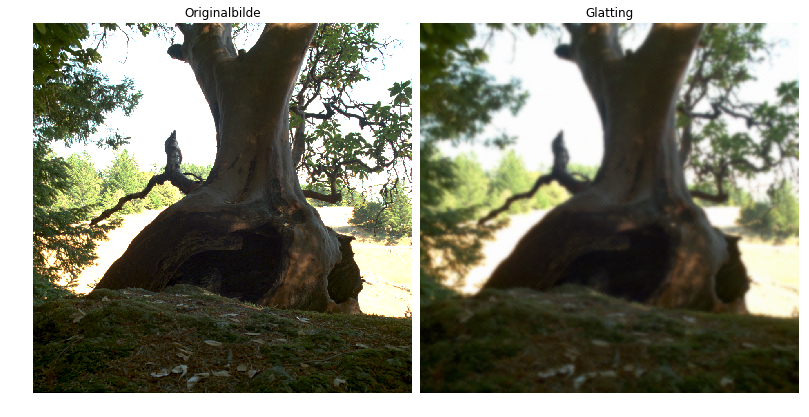

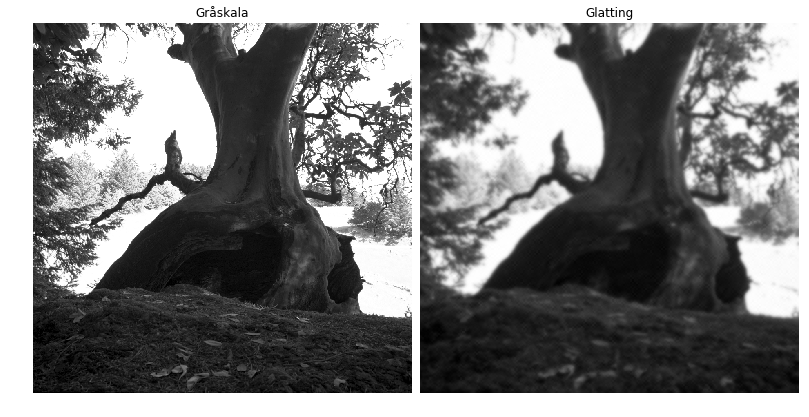

In [8]:
glatting(Tree, constant)

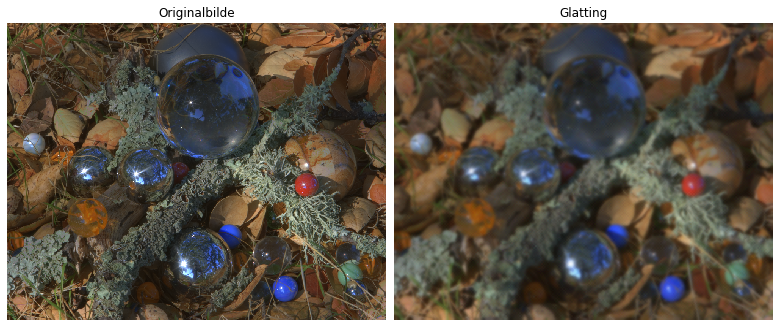

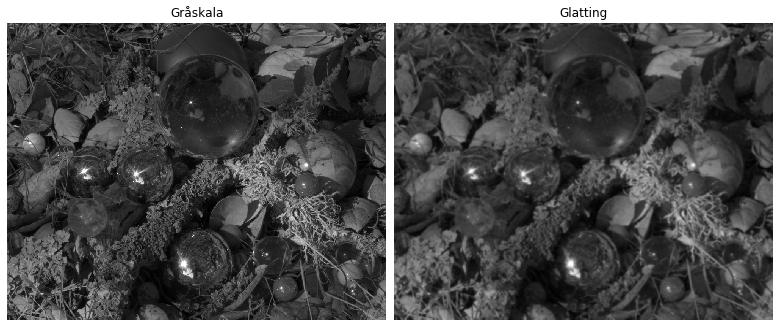

In [5]:
glatting(Balls, constant)